In [1]:
from util import (
    read_pickle,
    to_binary_label,
    save_to_pickle
)
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score, f1_score

import os

import numpy as np
from statistics import mean

def calculate_map_mrr(y_true, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]

    y_true = y_true[sorted_indices]
    y_pred = y_pred[sorted_indices]
    
    num_relevantes = 0
    map_score = 0
    mrr_score = 0
    
    for i, true_ele in enumerate(y_true):
        if not true_ele:
            break
        else:
            if to_binary_label(y_pred[i]):
                num_relevantes += 1
            map_score = num_relevantes/(i + 1)
            if mrr_score == 0 and map_score != 0:
                mrr_score = map_score
        
    return mrr_score, map_score

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

def list_files(directory):
    files = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        if os.path.isfile(path):
            files.append(filename)
    return files

def my_confusion_matrix(model_name, y_test, y_pred, map_score, mrr_score, save_path):    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    matrix = confusion_matrix(y_test, y_pred, normalize='true')

    plt.figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k')

    classes = ['Not similar', 'Similar']
    len_classes = len(classes)
    labels = ["{0:0.2%}".format(value) for value in matrix.flatten()]
    
    labels = np.asarray(labels).reshape(len_classes,len_classes)

    res = sns.heatmap(matrix, annot=labels, vmin=0.0, vmax=1, cmap=cmap, fmt='', cbar_kws={"shrink": .82}, xticklabels=classes, yticklabels=classes)

    stats_text = f"\n\nAccuracy: {accuracy:.2%}\nPrecision: {precision:.2%}\nRecall: {recall:.2%}\nF1 Score: {f1:.2%}\n\nMRR Score: {mrr_score:.2%}\nMAP Score: {map_score:.2%}\n"
    
    res.set_xlabel('Predicted Label')
    res.set_ylabel('True Label')
    res.set_title(f'{model_name} Metrics: {stats_text}')
    
    for _, spine in res.spines.items():
        spine.set_visible(True)
    
    
    '''
    # Salvar o plot como um arquivo PNG
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()
    '''

In [6]:
directory = 'C:/Users/Iann/Desktop/bug_report_request/predictions/'
for file_name in list_files(directory):
    file = read_pickle(f"{directory}{('.').join(file_name.split('.')[:-1])}")
    print(file_name, file['best_f1'])

1.52m simple.pkl 0
10.10m balanced cosine distance t5.pkl 0.9410281988006738
11.10m balanced cosine distance t5 without stopwords.pkl 0.9416677880688517
12.10m balanced cosine distance t5 lemmatized.pkl 0.9416056770968377
13.10m balanced embeddings t5.pkl 0.939885065987748
14.10m balanced embeddings t5 without stopwords.pkl 0.9422089208288583
15.10m balanced embeddings t5 lemmatized.pkl 0.939885065987748
16.10m balanced cosine distance tf-idf+t5.pkl 0.9420103621666844
17.10m balanced cosine distance tf-idf+t5 without stopwords.pkl 0.9411398924850888
18.10m balanced cosine distance tf-idf+t5 lemmatized.pkl 0.9416392698310214
19.10m balanced embeddings tf-idf+t5.pkl 0.9426001051538191
2.10m simple.pkl 0
20.10m balanced embeddings tf-idf+t5 without stopwords.pkl 0.9458312798276188
21.10m balanced embeddings tf-idf+t5 lemmatized.pkl 0.9480114991009722
3.10m balanced simple.pkl 0.939885065987748
4.10m balanced cosine distance tf-idf.pkl 0.9419678847940393
5.10m balanced cosine distance tf-i

In [8]:
pairs = []
batch_dir = f'../data/test/'
pairs_dir = f'{batch_dir}pairs/'

for batch in list_files(batch_dir):
    batch = ('.').join(batch.split('.')[:-1])
    arches = read_pickle(f"{batch_dir}{batch}")
    for arch in arches:
        pairs.append((arch['bug_report_1'], arch['bug_report_2']))

ids = set(valor for tupla in pairs for valor in tupla)

id_index_pair = {id: [i for i, pair in enumerate(pairs) if id in pair] for id in ids}

save_to_pickle(id_index_pair, f'{pairs_dir}pairs')
print(f'Pares de test salvos')

Pares de test salvos


c:\Users\Iann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Iann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Iann\AppData\Local\Temp\ipykernel_21680\3684958186.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Co

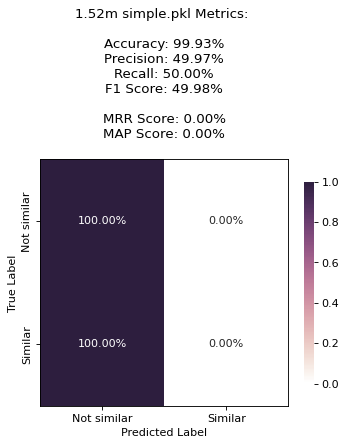

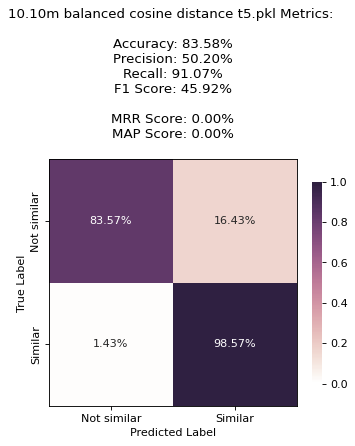

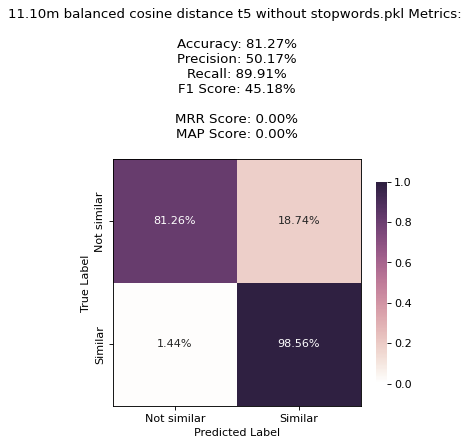

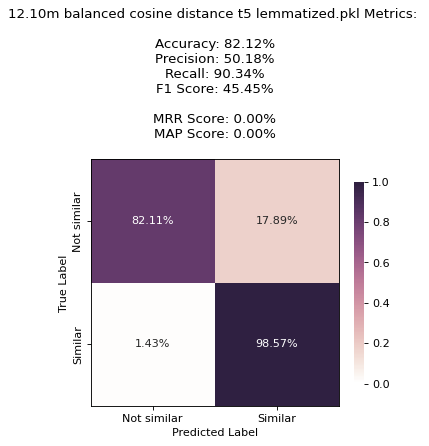

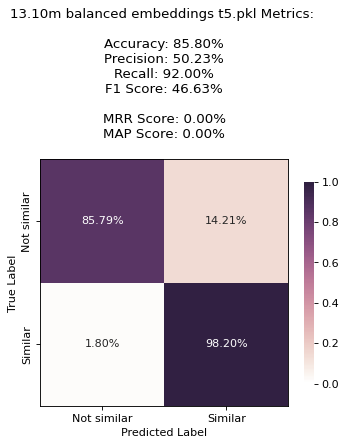

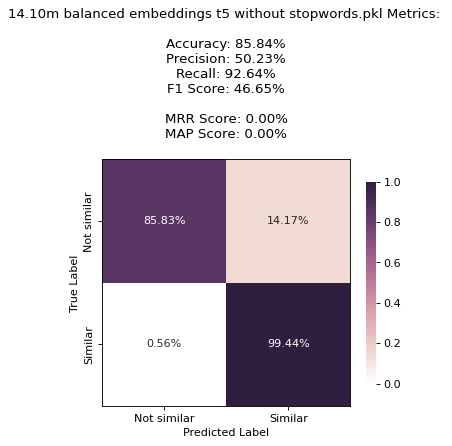

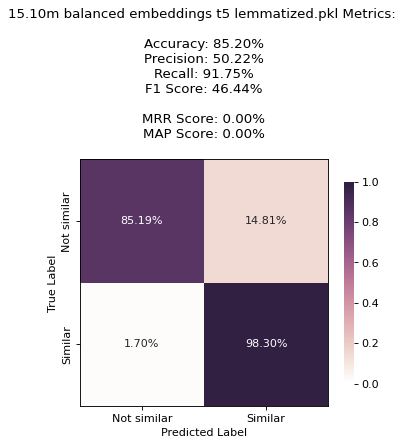

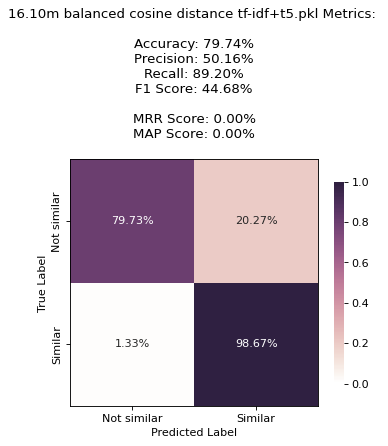

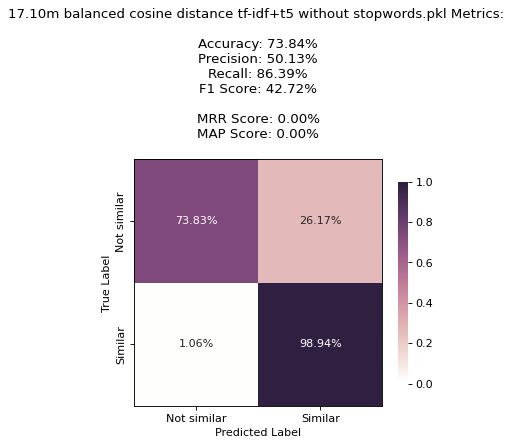

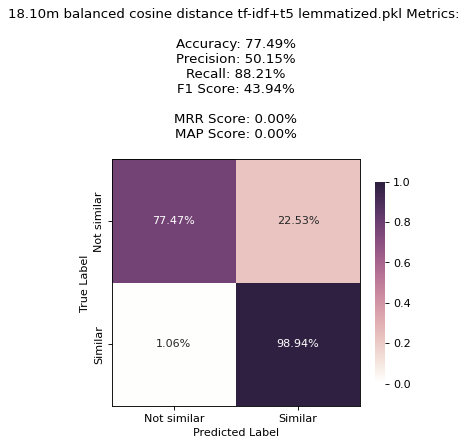

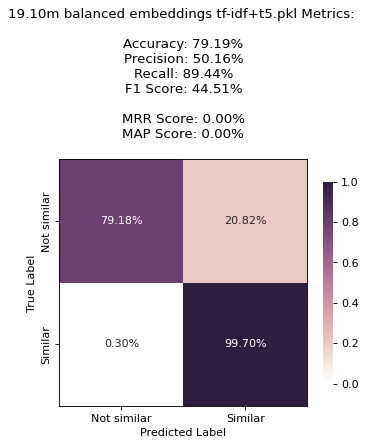

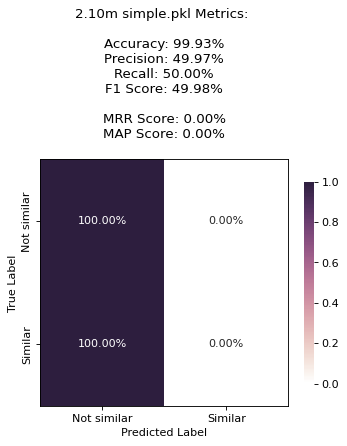

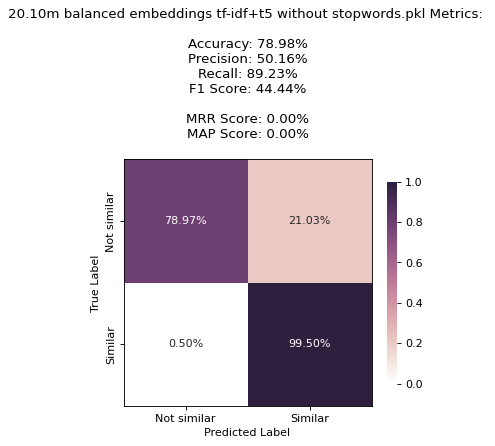

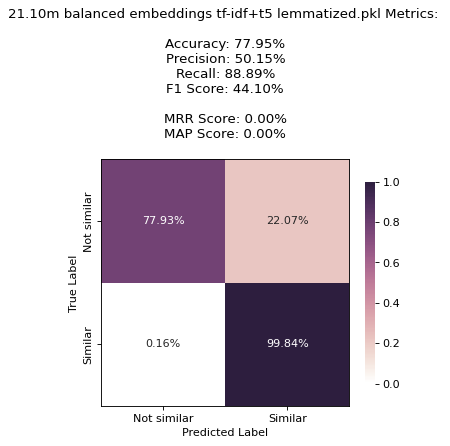

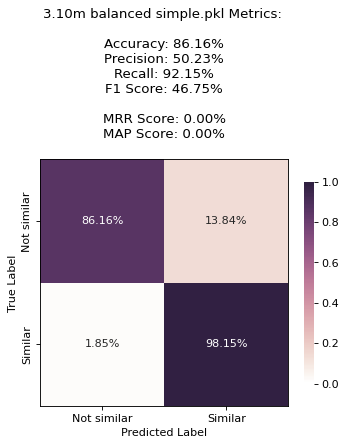

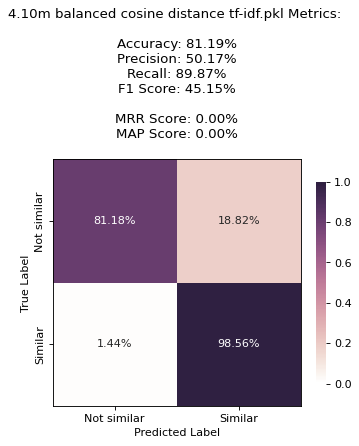

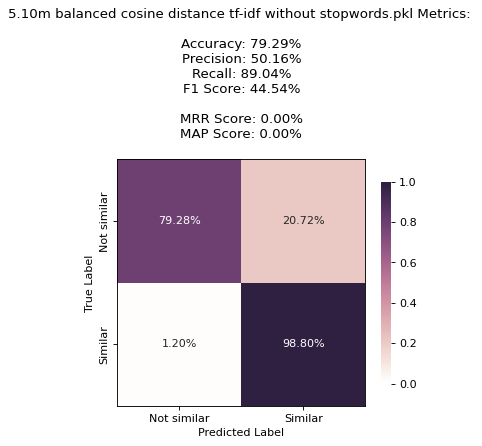

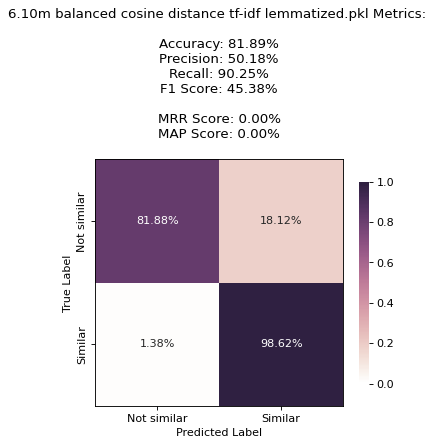

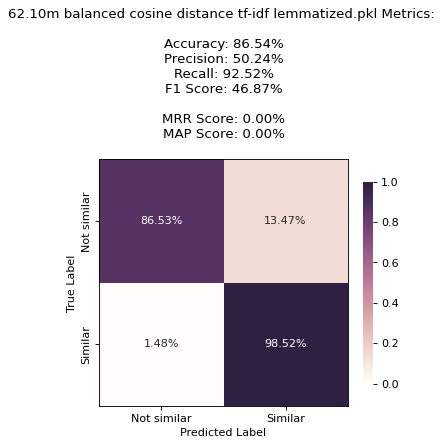

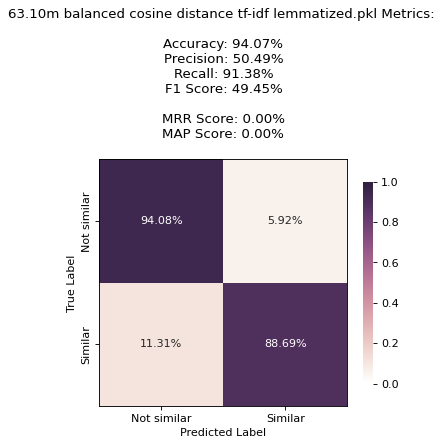

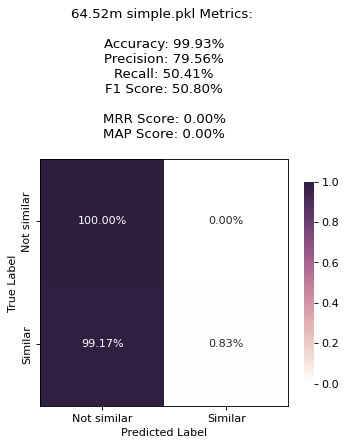

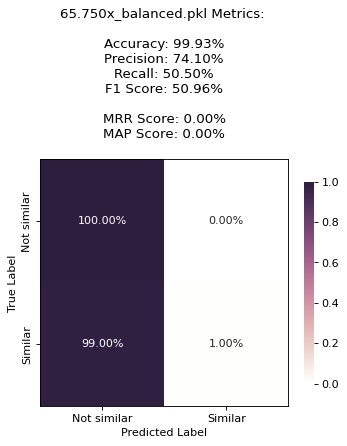

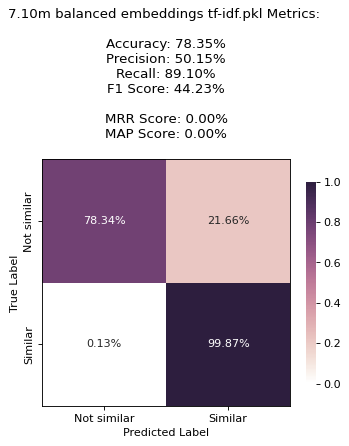

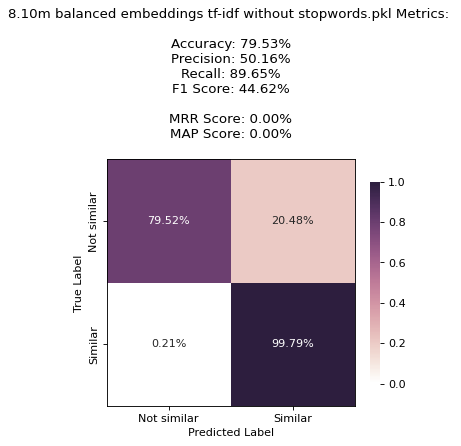

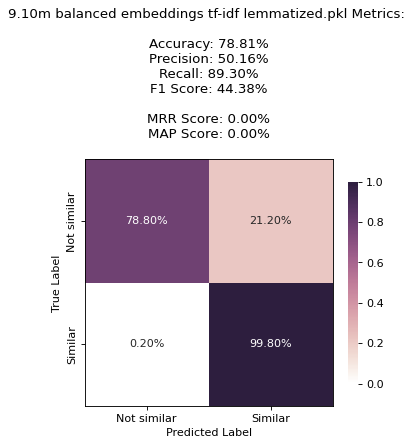

In [6]:
directory = '../predictions/'
output_directory = "../plots/"  # diretório onde você quer salvar os plots
pairs = read_pickle(f'{pairs_dir}pairs')

for file_name in list_files(directory):
    file = read_pickle(f"{directory}{('.').join(file_name.split('.')[:-1])}")
    y_true, y_pred = file['y_true'], file['y_pred']
    
    
    """
    mrr_scores, map_scores = [], []
    for _, info in pairs.items():
        true, pred = np.array([]), np.array([])
        for i in info:
            true = np.append(true, y_true[i])
            pred = np.append(pred, y_pred[i])
        
        if any(true):
            mrr_score, map_score = calculate_map_mrr(true, pred)
            map_scores.append(map_score)
            mrr_scores.append(mrr_score)
    """
    
    plot_save_path = os.path.join(output_directory, f"{file_name.replace('.pkl', '.png')}")
    my_confusion_matrix(file_name, y_true, [to_binary_label(pred) for pred in y_pred], mean(map_scores), mean(mrr_scores), plot_save_path)

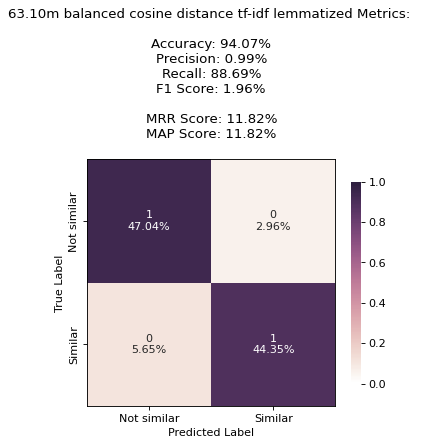

In [18]:
directory = '../predictions/'
batch_dir = f'../data/test/'
pairs_dir = f'{batch_dir}pairs/'
output_directory = "../plots/"  # diretório onde você quer salvar os plots
pairs = read_pickle(f'{pairs_dir}pairs')

file_name = f"63.10m balanced cosine distance tf-idf lemmatized"
file = read_pickle(f"{directory}{file_name}")
y_true, y_pred = file['y_true'], file['y_pred']

mrr_scores, map_scores = [], []
for _, info in pairs.items():
    true, pred = np.array([]), np.array([])
    for i in info:
        true = np.append(true, y_true[i])
        pred = np.append(pred, y_pred[i])
    
    if any(true):
        mrr_score, map_score = calculate_map_mrr(true, pred)
        map_scores.append(map_score)
        mrr_scores.append(mrr_score)

plot_save_path = os.path.join(output_directory, f"{file_name.replace('.pkl', '.png')}")
my_confusion_matrix(file_name, y_true, [to_binary_label(pred) for pred in y_pred], mean(map_scores), mean(mrr_scores), plot_save_path)

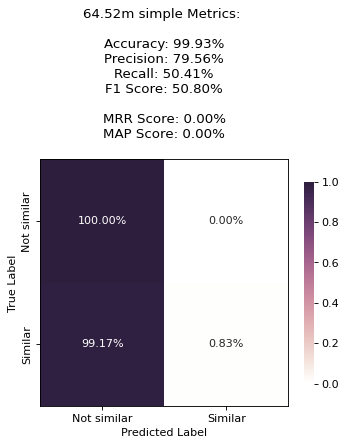

In [3]:
directory = '../predictions/'
batch_dir = f'../data/test/'
pairs_dir = f'{batch_dir}pairs/'
output_directory = "../plots/"  # diretório onde você quer salvar os plots
pairs = read_pickle(f'{pairs_dir}pairs')

file_name = f"64.52m simple"
file = read_pickle(f"{directory}{file_name}")
y_true, y_pred = file['y_true'], file['y_pred']

"""
mrr_scores, map_scores = [], []
for _, info in pairs.items():
    true, pred = np.array([]), np.array([])
    for i in info:
        true = np.append(true, y_true[i])
        pred = np.append(pred, y_pred[i])
    
    if any(true):
        mrr_score, map_score = calculate_map_mrr(true, pred)
        map_scores.append(map_score)
        mrr_scores.append(mrr_score)
"""

plot_save_path = os.path.join(output_directory, f"{file_name.replace('.pkl', '.png')}")
my_confusion_matrix(file_name, y_true, [to_binary_label(pred) for pred in y_pred], mean(map_scores), mean(mrr_scores), plot_save_path)

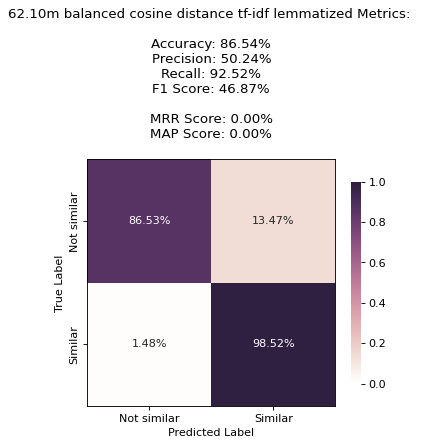

In [4]:
directory = '../predictions/'
batch_dir = f'../data/test/'
pairs_dir = f'{batch_dir}pairs/'
output_directory = "../plots/"  # diretório onde você quer salvar os plots
pairs = read_pickle(f'{pairs_dir}pairs')

file_name = f"62.10m balanced cosine distance tf-idf lemmatized"
file = read_pickle(f"{directory}{file_name}")
y_true, y_pred = file['y_true'], file['y_pred']

mrr_scores, map_scores = [0], [0]

"""
for _, info in pairs.items():
    true, pred = np.array([]), np.array([])
    for i in info:
        true = np.append(true, y_true[i])
        pred = np.append(pred, y_pred[i])
    
    if any(true):
        mrr_score, map_score = calculate_map_mrr(true, pred)
        map_scores.append(map_score)
        mrr_scores.append(mrr_score)
"""

plot_save_path = os.path.join(output_directory, f"{file_name.replace('.pkl', '.png')}")
my_confusion_matrix(file_name, y_true, [to_binary_label(pred) for pred in y_pred], mean(map_scores), mean(mrr_scores), plot_save_path)

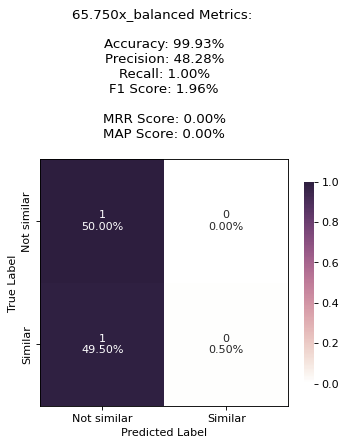

In [6]:
directory = '../predictions/'
batch_dir = f'../data/test/'
pairs_dir = f'{batch_dir}pairs/'
output_directory = "../plots/"  # diretório onde você quer salvar os plots
pairs = read_pickle(f'{pairs_dir}pairs')

file_name = f"65.750x_balanced"
file = read_pickle(f"{directory}{file_name}")
y_true, y_pred = file['y_true'], file['y_pred']

mrr_scores, map_scores = [0], [0]

plot_save_path = os.path.join(output_directory, f"{file_name.replace('.pkl', '.png')}")
my_confusion_matrix(file_name, y_true, [to_binary_label(pred) for pred in y_pred], mean(map_scores), mean(mrr_scores), plot_save_path)

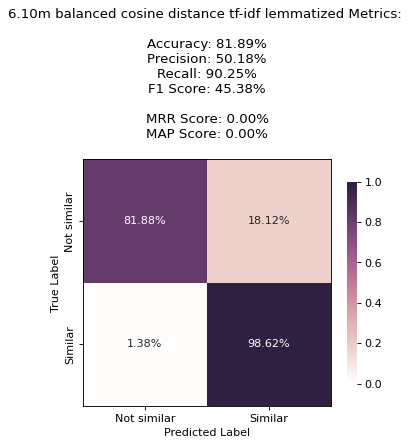

In [5]:
directory = '../predictions/'
batch_dir = f'../data/test/'
pairs_dir = f'{batch_dir}pairs/'
output_directory = "../plots/"  # diretório onde você quer salvar os plots
pairs = read_pickle(f'{pairs_dir}pairs')

file_name = f"6.10m balanced cosine distance tf-idf lemmatized"
file = read_pickle(f"{directory}{file_name}")
y_true, y_pred = file['y_true'], file['y_pred']

mrr_scores, map_scores = [0], [0]

plot_save_path = os.path.join(output_directory, f"{file_name.replace('.pkl', '.png')}")
my_confusion_matrix(file_name, y_true, [to_binary_label(pred) for pred in y_pred], mean(map_scores), mean(mrr_scores), plot_save_path)

In [1]:
from util import initialize_mongo

MONGO = initialize_mongo("archs_without_test")
similars = MONGO.count_documents({"similarity_files": {"$gte": 0.5}})

In [4]:
n_arches = 42038049
not_similars = n_arches - similars

In [10]:
(not_similars / n_arches) * 100

99.93302733911366

In [11]:
(similars / n_arches) * 100

0.0669726608863318

In [5]:
not_similars / similars

1492.1465866306742

In [6]:
not_similars

42009895

In [7]:
similars

28154